## Imports and read in data

In [42]:
import tensorflow as tf

train_dir = "datasets/dataset"
test_dir = "datasets/dataset-test"

IMG_SIZE = (224, 224)   # or whatever size works for your model
BATCH_SIZE = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    label_mode="categorical",   # or "int"
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    label_mode="categorical",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)


Found 6554 files belonging to 62 classes.
Found 310 files belonging to 62 classes.


In [48]:
import tensorflow.keras as keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
num_classes = len(train_ds.class_names)
epochs = 20
batch_size= 32

from tensorflow.keras import layers, Sequential, optimizers

model = Sequential([
    keras.Input(shape=(224, 224, 3)),

    # Block 1
    layers.Conv2D(32, 3, activation='relu', padding='same'),
    layers.Conv2D(32, 3, activation='relu', padding='same'),
    layers.MaxPooling2D(2),
    layers.Dropout(0.25),  # <--- Dropout here

    # Block 2
    layers.Conv2D(64, 3, activation='relu', padding='same'),
    layers.Conv2D(64, 3, activation='relu', padding='same'),
    layers.MaxPooling2D(2),
    layers.Dropout(0.25),  # <--- Dropout here

    # Block 3
    layers.Conv2D(128, 3, activation='relu', padding='same'),
    layers.Conv2D(128, 3, activation='relu', padding='same'),
    layers.MaxPooling2D(2),
    layers.Dropout(0.25),  # <--- Dropout here

    # Dense layers
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax' if num_classes > 2 else 'sigmoid')
])

model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy' if num_classes > 2 else 'binary_crossentropy',
    metrics=['accuracy']
)


model.summary()

history = model.fit(train_ds,
                        validation_data = test_ds,
                        batch_size=batch_size,epochs=epochs,
                        verbose=1)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 conv2d_15 (Conv2D)          (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 112, 112, 32)      0         
 ng2D)                                                           
                                                                 
 dropout_9 (Dropout)         (None, 112, 112, 32)      0         
                                                                 
 conv2d_16 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 conv2d_17 (Conv2D)          (None, 112, 112, 64)      36928     
                                                      

2025-12-01 21:28:18.079280: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:1026] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_9/dropout_9/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
W0000 00:00:1764642498.640140 1872024 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1764642498.681070 1872024 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1764642498.689610 1872024 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1764642498.703528 1872024 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1764642498.717394 1872024 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1764642498.728035 1872024 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:

  1/205 [..............................] - ETA: 11:27 - loss: 24.7611 - accuracy: 0.0000e+00

'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
'+ptx85' is not a recognized feature for this target (ignoring feature)
W0000 00:00:1764642500.020547 1872024 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1764

204/205 [============================>.] - ETA: 0s - loss: 4.9729 - accuracy: 0.1575        

W0000 00:00:1764642533.303896 1872029 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1764642533.321405 1872029 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1764642533.325075 1872029 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1764642533.328741 1872029 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1764642533.333398 1872029 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1764642533.338331 1872029 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1764642533.343022 1872029 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1764642533.348528 1872029 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1764642533.355543 1872029 gp

205/205 [==============================] - 38s 169ms/step - loss: 4.9670 - accuracy: 0.1581 - val_loss: 4.1167 - val_accuracy: 0.0355
Epoch 2/20


W0000 00:00:1764642534.280967 1872023 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1764642534.289750 1872023 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1764642534.292968 1872023 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1764642534.296444 1872023 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1764642534.300505 1872023 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1764642534.304671 1872023 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1764642534.308910 1872023 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1764642534.313823 1872023 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1764642534.319757 1872023 gp

204/205 [============================>.] - ETA: 0s - loss: 3.3172 - accuracy: 0.2174  

W0000 00:00:1764642568.212246 1872026 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1764642568.217950 1872026 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1764642568.223469 1872026 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1764642568.234795 1872026 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1764642568.242805 1872026 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1764642568.254015 1872026 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1764642568.267417 1872026 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1764642568.280462 1872026 gpu_timer.cc:114] Skipping the delay kernel, measurement accuracy will be reduced
W0000 00:00:1764642568.290490 1872026 gp

205/205 [==============================] - 35s 166ms/step - loss: 3.3203 - accuracy: 0.2170 - val_loss: 4.1335 - val_accuracy: 0.0419
Epoch 3/20
205/205 [==============================] - 35s 166ms/step - loss: 3.2124 - accuracy: 0.2295 - val_loss: 4.0934 - val_accuracy: 0.0355
Epoch 4/20
205/205 [==============================] - 35s 166ms/step - loss: 3.1032 - accuracy: 0.2501 - val_loss: 4.1484 - val_accuracy: 0.0419
Epoch 5/20
205/205 [==============================] - 35s 166ms/step - loss: 2.9851 - accuracy: 0.2804 - val_loss: 4.2223 - val_accuracy: 0.0419
Epoch 6/20
205/205 [==============================] - 35s 167ms/step - loss: 2.8985 - accuracy: 0.2926 - val_loss: 4.2265 - val_accuracy: 0.0419
Epoch 7/20
205/205 [==============================] - 35s 167ms/step - loss: 2.8037 - accuracy: 0.3119 - val_loss: 4.3135 - val_accuracy: 0.0419
Epoch 8/20
205/205 [==============================] - 35s 167ms/step - loss: 2.6924 - accuracy: 0.3294 - val_loss: 4.3840 - val_accuracy: 0.0

In [41]:
import os
import tensorflow as tf

def check_tf_read(directory):
    bad = []
    for root, dirs, files in os.walk(directory):
        for f in files:
            path = os.path.join(root, f)
            try:
                raw = tf.io.read_file(path)
                tf.image.decode_image(raw)  # <-- TF’s decoder
            except Exception as e:
                print("BAD FILE:", path)
                print("   Error:", e)
                bad.append(path)
    return bad

bad_train = check_tf_read("datasets/dataset")
bad_test = check_tf_read("datasets/dataset-test")

print("Bad files found:", bad_train + bad_test)


BAD FILE: datasets/dataset/Cattail/Cattail2.jpg
   Error: {{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeImage] name: 
BAD FILE: datasets/dataset/Kudzu/Kudzu13.jpg
   Error: {{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeImage] name: 
BAD FILE: datasets/dataset/Mallow/Mallow11.jpg
   Error: {{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeImage] name: 
BAD FILE: datasets/dataset/Pickerelweed/Pickerelweed43.jpg
   Error: {{function_node __wrapped__DecodeImage_device_/job:localhost/replica:0/task:0/device:CPU:0}} Unknown image file format. One of JPEG, PNG, GIF, BMP required. [Op:DecodeImage] name: 
Bad files found: ['datasets/dataset/C

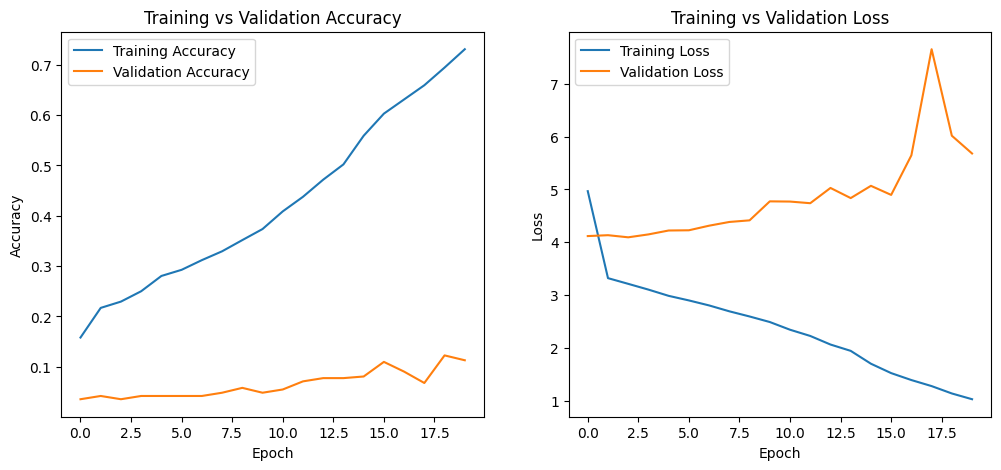

In [49]:
import matplotlib.pyplot as plt

# Extract metrics
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

# Plot Accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()
